In [20]:
from vpython import *
from matplotlib import pyplot as plt
import numpy as np
import random
import math

# Crystal Lattice

In [21]:
#Used in original submission
def find_neighbors(atom, atoms, radius):
    neighbors = []
    neighbors_dist = []
    for idx,other in enumerate(atoms):
        if other != atom and mag(other.pos - atom.pos) <= radius:
            neighbors.append(idx)
            neighbors_dist.append(mag(other.pos - atom.pos))
    return neighbors, neighbors_dist

In [1]:
from vpython import *
import numpy as np
import matplotlib.pyplot as plt

scene = canvas()
N = 3 # N by N by N array of atoms
# Surrounding the N**3 atoms is another layer of invisible fixed-position atoms
# that provide stability to the lattice.
k = 1
m = 1
spacing = 1
atom_radius = 0.3*spacing
#L0 = initial spring length
L0 = spacing-1.8*atom_radius
V0 = pi*(0.5*atom_radius)**2*L0 # initial volume of spring
scene.center = 0.5*(N-1)*vector(1,1,1)
scene.background = color.white
dt = 0.01
axes = [vector(1,0,0), vector(0,1,0), vector(0,0,1)]
run = True

class crystal:     
    def __init__(self,  N, atom_radius, spacing, momentumRange ):
        self.atoms = []
        self.springs = []
        # Create (N)**3 atoms in a grid; the outermost atoms are fixed and invisible
        for z in range(0,N,1):
            for y in range(0,N,1):
                for x in range(0,N,1):
                    atom = sphere()
                    atom.pos = vector(x,y,z)*spacing
                    print("atom pos: " + str(atom.pos))
                    atom.radius = atom_radius
                    atom.color = vector(0,0.58,0.69)
                    atom.visible = True
                    atom.velocity = .1*vec.random()
                    atom.index = len(self.atoms)
                    self.atoms.append(atom)
        for i,atom in enumerate(self.atoms):
            atom.neighbors, atom.neighbors_dist = find_neighbors(atom, self.atoms, 1)
#             print("Atom " + str(i) + " neighbors: " + str(atom.neighbors))
            for j, neighbor in enumerate(atom.neighbors):
                if True:
#                     print("SPRING")
                    self.make_spring(atom, self.atoms[neighbor], False)

    # Create a spring linking two atoms
    def make_spring(self, start, end, visible):
        spring = helix()
        spring.pos = start.pos
        spring.axis = end.pos-start.pos
        spring.visible = visible
        spring.thickness = 0.05
        spring.radius = 0.5*atom_radius
        spring.length = spacing
        spring.start = start
        spring.end = end
        spring.color = color.orange
        self.springs.append(spring)

c = crystal(N, atom_radius, spacing, 0.1*spacing*sqrt(k/m))
# print("Atom Neighbors: " + str([atom.neighbors for atom in c.atoms]))
next_pos = np.array([atom.pos for atom in c.atoms])
init_pos = np.copy(next_pos)
next_velocity = np.array([atom.velocity for atom in c.atoms])
k_energy = []
p_energy = []
t_energy = []
time = []
t = 0
while t < 10:
    rate(100)
    scene.camera.follow(c.atoms[8])
    kin_energy = 0
    pot_energy = 0
    # Calculate the force on each atom
    for i, atom in enumerate(c.atoms):
        force = vector(0,0,0)
        for j, neighbor in enumerate(atom.neighbors):
            #avoid double counting the springs
            if j > i:
                spring_axis = c.atoms[neighbor].pos - atom.pos
                # Hooke's law for a spring
                pot_energy += 0.5*k*(mag(spring_axis)-L0)**2
                force += -k * (mag(spring_axis)-L0) * norm(spring_axis)
        next_velocity[i] += dt * force / m
        next_pos[i] = next_pos[i] + dt * next_velocity[i]
    # Update
    for i, atom in enumerate(c.atoms):
        atom.pos = next_pos[i]
        atom.velocity = next_velocity[i]
        # Record energies and time for plotting
        kin_energy += .5*m*next_velocity[i].mag2
    k_energy.append(kin_energy)
    p_energy.append(pot_energy)
    t_energy.append(kin_energy + pot_energy)
    time.append(t)
    t += dt


# Plot energy over time
plt.plot(time, k_energy, label='Kinetic energy')
plt.plot(time, p_energy, label='Potential energy')
plt.plot(time, t_energy, label='Total energy')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

atom pos: <0, 0, 0>
atom pos: <1, 0, 0>
atom pos: <2, 0, 0>
atom pos: <0, 1, 0>
atom pos: <1, 1, 0>
atom pos: <2, 1, 0>
atom pos: <0, 2, 0>
atom pos: <1, 2, 0>
atom pos: <2, 2, 0>
atom pos: <0, 0, 1>
atom pos: <1, 0, 1>
atom pos: <2, 0, 1>
atom pos: <0, 1, 1>
atom pos: <1, 1, 1>
atom pos: <2, 1, 1>
atom pos: <0, 2, 1>
atom pos: <1, 2, 1>
atom pos: <2, 2, 1>
atom pos: <0, 0, 2>
atom pos: <1, 0, 2>
atom pos: <2, 0, 2>
atom pos: <0, 1, 2>
atom pos: <1, 1, 2>
atom pos: <2, 1, 2>
atom pos: <0, 2, 2>
atom pos: <1, 2, 2>
atom pos: <2, 2, 2>


NameError: name 'find_neighbors' is not defined

## 1D

I chose initial paramters of a random initial velocity in the range from (-.1,.1) after trial and error. I started with a range from (-1,1) and realized that was too high and caused the atoms to explode off the screen. I also chose the atoms to be spaced by 1 which worked fine when translating the code from glowscript. I also chose a small deltat to make small updates to the positions and velocities and chose a timelength of 10 because it was an adequite timelength for plotting the energies. 

## 1F

The total energy is constant and is a sum of the kinetic and potential energies. The potential energy is also the inverse of the kinetic energy when using Backward Euler and running it over multiple instances. 

In [23]:
def next_state_position(integration_method,next_position_x,next_position_y,next_position_z,current_velocity_x,current_velocity_y,current_velocity_z,next_velocity_x,next_velocity_y,next_velocity_z,dt):
    next_position = vector(next_position_x,next_position_y,next_position_z)
    current_velocity = vector(current_velocity_x,current_velocity_y,current_velocity_z)
    next_velocity = vector(next_velocity_x,next_velocity_y,next_velocity_z)
    if integration_method == "Forward Euler":
        next_position = next_position + current_velocity*dt
    elif integration_method == "Backward Euler":
        next_position = next_position + next_velocity*dt
    elif integration_method == "Trapezoid":
        next_position = next_position + .5*(current_velocity + next_velocity)*dt
    return next_position

## Other Integration Techniques

In [24]:
#Used in original submission
def find_neighbors(atom, atoms, radius):
    neighbors = []
    neighbors_dist = []
    for idx,other in enumerate(atoms):
        if other != atom and mag(other.pos - atom.pos) <= radius:
            neighbors.append(idx)
            neighbors_dist.append(mag(other.pos - atom.pos))
    return neighbors, neighbors_dist

<IPython.core.display.Javascript object>

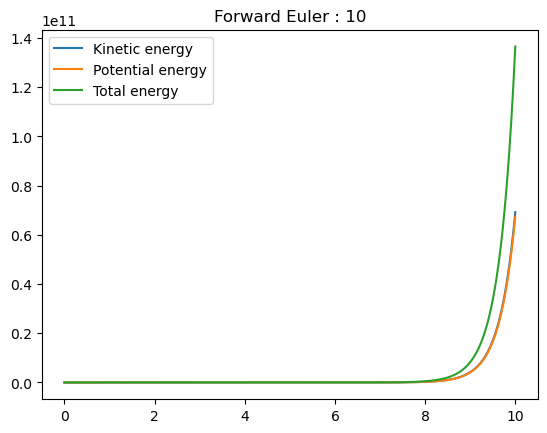

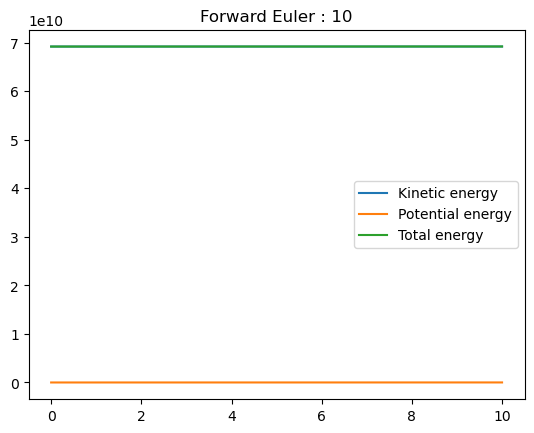

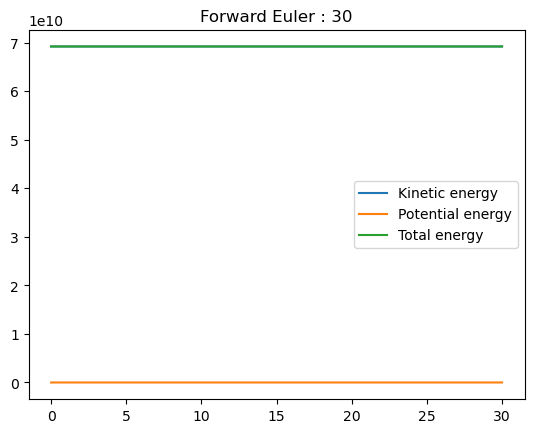

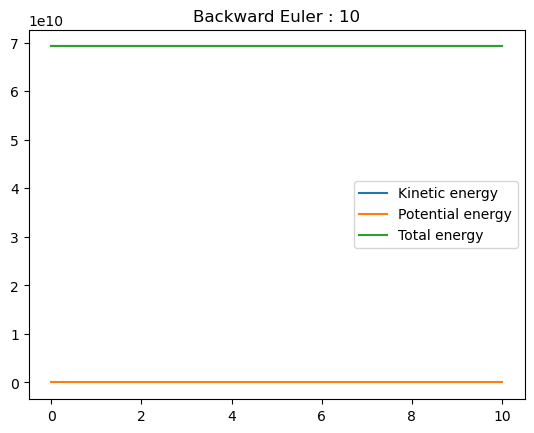

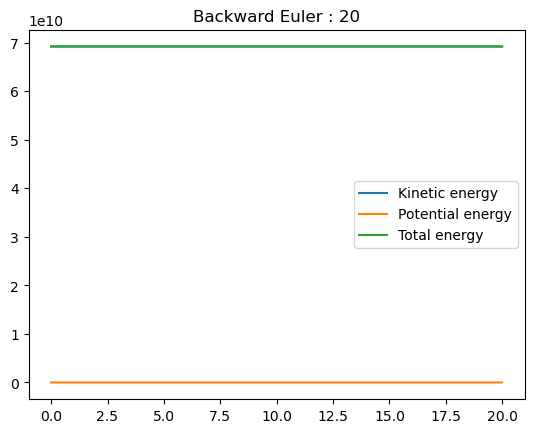

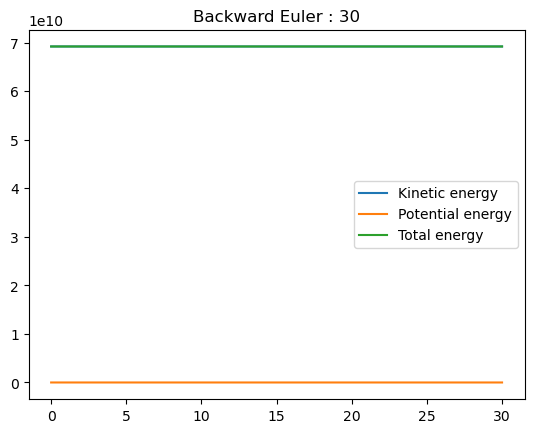

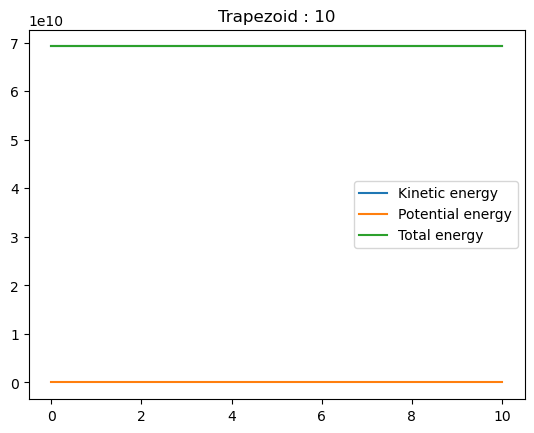

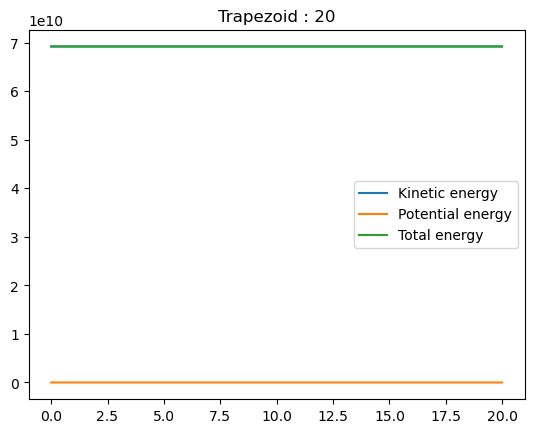

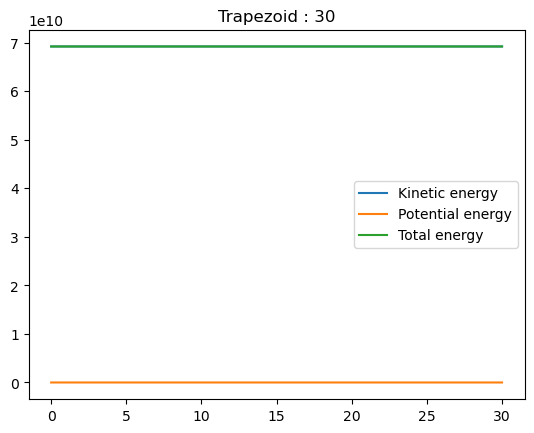

In [25]:
from vpython import *
import numpy as np
import matplotlib.pyplot as plt

scene = canvas()
N = 3 # N by N by N array of atoms
# Surrounding the N**3 atoms is another layer of invisible fixed-position atoms
# that provide stability to the lattice.
k = 1
m = 1
spacing = 1
atom_radius = 0.3*spacing
#L0 = initial spring length
L0 = spacing-1.8*atom_radius
V0 = pi*(0.5*atom_radius)**2*L0 # initial volume of spring
scene.center = 0.5*(N-1)*vector(1,1,1)
scene.background = color.white
dt = 0.01
axes = [vector(1,0,0), vector(0,1,0), vector(0,0,1)]
run = True

class crystal:     
    def __init__(self,  N, atom_radius, spacing, momentumRange ):
        self.atoms = []
        self.springs = []
        # Create (N)**3 atoms in a grid; the outermost atoms are fixed and invisible
        for z in range(0,N,1):
            for y in range(0,N,1):
                for x in range(0,N,1):
                    atom = sphere()
                    atom.pos = vector(x,y,z)*spacing
                    atom.radius = atom_radius
                    atom.color = vector(0,0.58,0.69)
                    atom.visible = True
                    atom.velocity = .1*vec.random()
                    atom.index = len(self.atoms)
                    self.atoms.append(atom)
        for i, atom in enumerate(self.atoms):
            atom.neighbors, atom.neighbors_dist = find_neighbors(atom, c.atoms, 1.2*atom_radius)
            for j, neighbor in enumerate(atom.neighbors):
                 self.make_spring(atom, self.atoms[neighbor], False)

    # Create a spring linking two atoms
    def make_spring(self, start, end, visible):
        spring = helix()
        spring.pos = start.pos
        spring.axis = end.pos-start.pos
        spring.visible = visible
        spring.thickness = 0.05
        spring.radius = 0.5*atom_radius
        spring.length = spacing
        spring.start = start
        spring.end = end
        spring.color = color.orange
        self.springs.append(spring)

c = crystal(N, atom_radius, spacing, 0.1*spacing*sqrt(k/m))
next_pos = np.array([atom.pos for atom in c.atoms])
init_pos = np.copy(next_pos)
next_velocity = np.array([atom.velocity for atom in c.atoms])
t = 0
integration_techniques = ["Forward Euler", "Backward Euler", "Trapezoid"]
time_length = [10,20,30]
for integ in range(len(integration_techniques)):
    for j in range(len(time_length)):
        t = 0
        k_energy = []
        p_energy = []
        t_energy = []
        time = []
        while t < time_length[j]:
            rate(100)
            scene.camera.follow(c.atoms[0])
            kin_energy = 0
            pot_energy = 0
            # Calculate the force on each atom
            for i, atom in enumerate(c.atoms):
                force = vector(0,0,0)
                current_velocity = next_velocity[i]
        #         print("neighbors: " + str(neighbors))
                for j, neighbor in enumerate(atom.neighbors):
                    if True:
                        spring_axis = c.atoms[neighbor].pos - atom.pos
                        # Hooke's law for a spring
                        pot_energy += 0.5*k*(mag(spring_axis)-L0)**2
                        force += -k * (mag(spring_axis)-L0) * norm(spring_axis)
                next_velocity[i] += dt * force / m
                next_pos[i] = next_state_position(integration_techniques[integ],next_pos[i].x,next_pos[i].y,next_pos[i].z,current_velocity.x,current_velocity.y,current_velocity.z,next_velocity[i].x,next_velocity[i].y,next_velocity[i].z,dt)
            # Update
            for i, atom in enumerate(c.atoms):
                atom.pos = next_pos[i]
                atom.velocity = next_velocity[i]
                # Record energies and time for plotting
                kin_energy += .5*m*next_velocity[i].mag2
            k_energy.append(kin_energy)
            p_energy.append(pot_energy)
            t_energy.append(kin_energy + pot_energy)
            time.append(t)
            t += dt
        # Plot energy over time
        plt.figure()
        plt.title(integration_techniques[integ] + " : " + str(time_length[j]))
        plt.plot(time, k_energy, label='Kinetic energy')
        plt.plot(time, p_energy, label='Potential energy')
        plt.plot(time, t_energy, label='Total energy')
        plt.legend()
        plt.show()
        for atom in c.atoms:
            atom.visible = False
        c = crystal(N, atom_radius, spacing, 0.1*spacing*sqrt(k/m))


# References

https://www.glowscript.org/#/user/matterandinteractions/folder/matterandinteractions/program/04-ball-and-spring-model/edit

https://calculator.academy/spring-velocity-calculator/

## 1H Spring Damping using original implementation

<IPython.core.display.Javascript object>

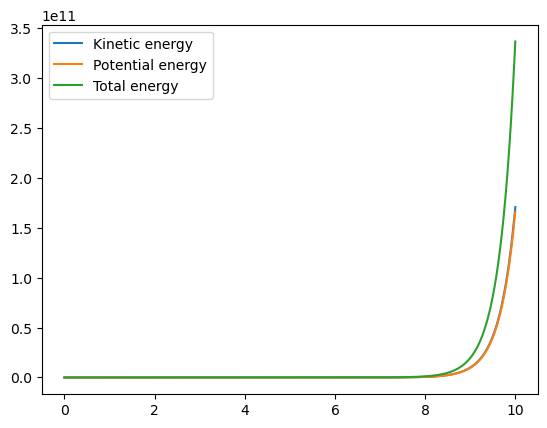

In [26]:
from vpython import *
import numpy as np
import matplotlib.pyplot as plt

scene = canvas()
N = 3 # N by N by N array of atoms
# Surrounding the N**3 atoms is another layer of invisible fixed-position atoms
# that provide stability to the lattice.
k = 1
m = 1
spacing = 1
atom_radius = 0.3*spacing
#b = damping coefficient
b = .01
#L0 = initial spring length
L0 = spacing-1.8*atom_radius
V0 = pi*(0.5*atom_radius)**2*L0 # initial volume of spring
scene.center = 0.5*(N-1)*vector(1,1,1)
scene.background = color.white
dt = 0.01
axes = [vector(1,0,0), vector(0,1,0), vector(0,0,1)]
run = True

class crystal:     
    def __init__(self,  N, atom_radius, spacing, momentumRange ):
        self.atoms = []
        self.springs = []
        # Create (N)**3 atoms in a grid; the outermost atoms are fixed and invisible
        for z in range(0,N,1):
            for y in range(0,N,1):
                for x in range(0,N,1):
                    atom = sphere()
                    atom.pos = vector(x,y,z)*spacing
                    atom.radius = atom_radius
                    atom.color = vector(0,0.58,0.69)
                    atom.visible = True
                    atom.velocity = .1*vec.random()
                    atom.index = len(self.atoms)
                    self.atoms.append(atom)
        for i,atom in enumerate(self.atoms):
            atom.neighbors, atom.neighbors_dist = find_neighbors(atom, self.atoms, 1)
#             print("Atom " + str(i) + " neighbors: " + str(atom.neighbors))
            for j, neighbor in enumerate(atom.neighbors):
                if True:
#                     print("SPRING")
                    self.make_spring(atom, self.atoms[neighbor], False)

    # Create a spring linking two atoms
    def make_spring(self, start, end, visible):
        spring = helix()
        spring.pos = start.pos
        spring.axis = end.pos-start.pos
        spring.visible = visible
        spring.thickness = 0.05
        spring.radius = 0.5*atom_radius
        spring.length = spacing
        spring.start = start
        spring.end = end
        spring.color = color.orange
        self.springs.append(spring)

c = crystal(N, atom_radius, spacing, 0.1*spacing*sqrt(k/m))
next_pos = np.array([atom.pos for atom in c.atoms])
init_pos = np.copy(next_pos)
next_velocity = np.array([atom.velocity for atom in c.atoms])
k_energy = []
p_energy = []
t_energy = []
time = []
t = 0
while t < 10:
    rate(100)
    scene.camera.follow(c.atoms[8])
    kin_energy = 0
    pot_energy = 0
    # Calculate the force on each atom
    for i, atom in enumerate(c.atoms):
        force = vector(0,0,0)
        for j, neighbor in enumerate(atom.neighbors):
            #avoid double counting the springs
            if j > i:
                spring_axis = c.atoms[neighbor].pos - atom.pos
                # Hooke's law for a spring
                spring_length = mag(spring_axis)
                spring_velocity = dot((next_velocity[neighbor] - next_velocity[i]), norm(spring_axis))
                force_mag = -k * (spring_length - L0) - b * spring_velocity
                pot_energy += 0.5 * k * (spring_length - L0) ** 2
                force += force_mag * norm(spring_axis)
        next_velocity[i] += dt * force / m
        next_pos[i] = next_pos[i] + dt * next_velocity[i]
    # Update
    for i, atom in enumerate(c.atoms):
        atom.pos = next_pos[i]
        atom.velocity = next_velocity[i]
        # Record energies and time for plotting
        kin_energy += .5*m*next_velocity[i].mag2
    k_energy.append(kin_energy)
    p_energy.append(pot_energy)
    t_energy.append(kin_energy + pot_energy)
    time.append(t)
    t += dt


# Plot energy over time
plt.plot(time, k_energy, label='Kinetic energy')
plt.plot(time, p_energy, label='Potential energy')
plt.plot(time, t_energy, label='Total energy')
plt.legend()
plt.show()


Spring damping should result in an exponential decay in the energy of our system as time elapses since there is no longer a conservation of energy within our system.

## References

https://www.ryanjuckett.com/damped-springs/